### Working with Moon Data

In [2]:
# moon is nature of a data 

### 1. Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

### 2. Fetch, Load and Visualize data

##### 2.1 Fetch data from sklearn datasets

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [5]:
X

array([[ 8.31039149e-01, -2.58748754e-01],
       [ 1.18506381e+00,  9.20387143e-01],
       [ 1.16402213e+00, -4.55525583e-01],
       [-2.36556013e-02,  1.08628844e+00],
       [ 4.80502733e-01,  1.50942444e+00],
       [ 1.31164912e+00, -5.51176060e-01],
       [ 1.16542367e+00, -1.58629894e-01],
       [ 1.56736404e-01,  1.31817168e+00],
       [ 4.53301022e-01,  4.96074925e-01],
       [ 1.65139719e+00, -4.59804351e-01],
       [ 1.02664982e+00, -1.56999382e-02],
       [-3.99677570e-01,  2.52192940e-01],
       [ 1.85352710e+00, -7.16418704e-01],
       [ 1.17564737e-01,  6.24869329e-01],
       [ 1.54123944e+00, -5.11050694e-01],
       [ 1.32833559e+00, -5.40696860e-01],
       [ 1.97170320e+00,  2.97790052e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [ 8.30619129e-01, -8.02099114e-01],
       [ 1.89343763e+00, -2.53611270e-01],
       [ 1.88323111e+00,  2.22375278e-01],
       [ 2.30801311e+00,  4.67930154e-01],
       [-3.89437608e-01,  2.39389050e-01],
       [ 1.

##### 2.2 Visualize data

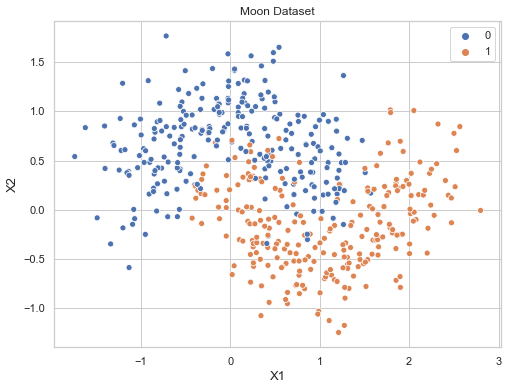

In [6]:
plt.figure(figsize=(8,6))

s = sns.scatterplot(X[:, 0], X[:,1], hue = y)

plt.xlabel('X1', fontsize=13)
plt.ylabel('X2', fontsize=13)
plt.title('Moon Dataset')

plt.show()

## 3. Training Model : Logistic Regression 

### 3.1 Logistic Classifier

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    x1s = np.linspace(-1.5,  2.5, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    
   #custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
   #plt.contourf(x1, x2 , y_pred, alpha=0.4, cmap= custom_cmap)
    
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.brg)
    
    s = sns.scatterplot(X[:, 0], X[:,1], hue = y)
    plt.xlabel('X1', fontsize=13)
    plt.ylabel('X2', fontsize=13)
    plt.title('Moon Dataset')
    plt.axis([-1.5, 2.5, -1, 1.5])

### 3.2 Visualize Logistic Classifier

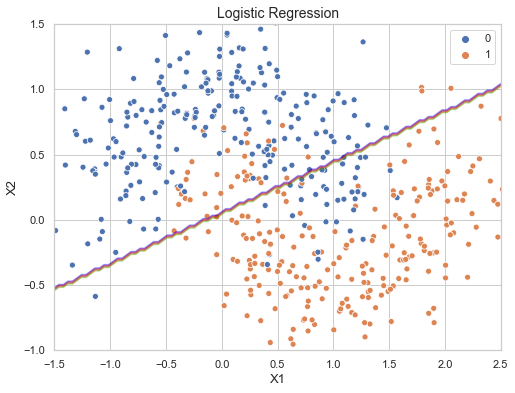

In [12]:
plt.figure(figsize=(8,6))
plot_decision_boundary(log_reg, X, y)
plt.title("Logistic Regression", fontsize=14)
plt.show()

### 3.3 Model Evalution

In [7]:
y_log_pred = log_reg.predict(X)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_log_pred))

0.842


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y, y_log_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       250
           1       0.84      0.84      0.84       250

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



## 4. Training Model : DecisionTree Classifier  

#### 4.1 DecisionTree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

#### 4.2 Visualize Logistic Classifier

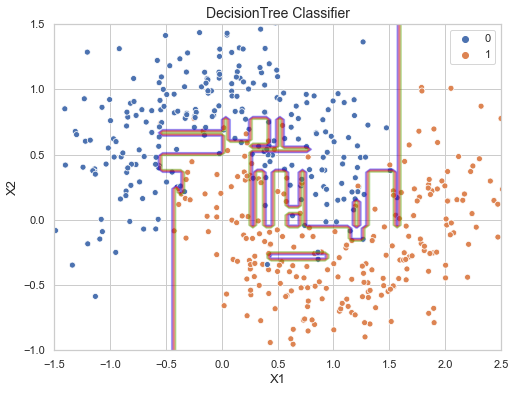

In [11]:
plt.figure(figsize=(8,6))
plot_decision_boundary(tree_clf, X, y)
plt.title("DecisionTree Classifier", fontsize=14)
plt.show()

#### 4.3 Model Evalution

In [12]:
y_tree_pred = tree_clf.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_tree_pred))

1.0


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y, y_tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



### 5. Training Model : Random Forest  Classifier

#### 5.1 Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X, y)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=50, random_state=42)

#### 5.2 Visualize Random Forest Classifier

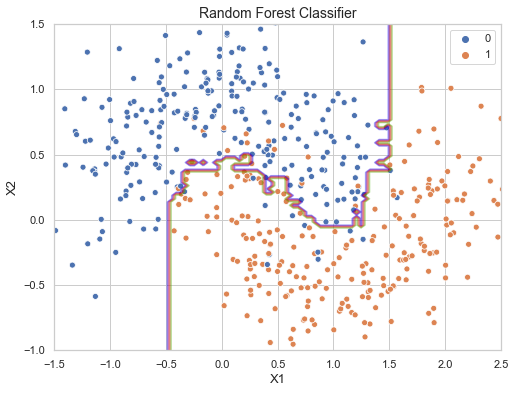

In [16]:
plt.figure(figsize=(8,6))

plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest Classifier", fontsize=14)
plt.show()

### 6. Training Model : KNN Classifier

#### 6.1 KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

knn_clf = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
knn_clf.fit(X, y)

y_train_pred_knn = knn_clf.predict(X)

#### 6.2 Visualize KNN Classifier

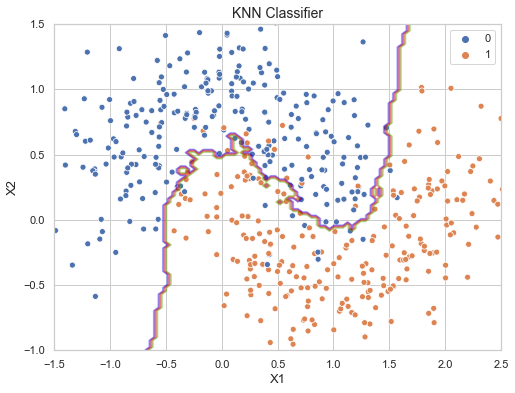

In [18]:
plt.figure(figsize=(8,6))

plot_decision_boundary(knn_clf, X, y)
plt.title("KNN Classifier", fontsize=14)
plt.show()

### 7. Training Model :  SVM Classifier

#### 7.1 Linear SVM Classifier

In [19]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X, y)

LinearSVC(C=1, loss='hinge', random_state=42)

#### 7.2 Visualize Linear SVM Classifier

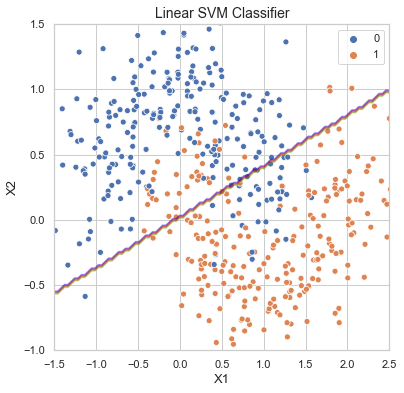

In [20]:
plt.figure(figsize=(6,6))

plot_decision_boundary(svm_clf, X, y)
plt.title("Linear SVM Classifier", fontsize=14)
plt.show()

#### 7.3 Polynomial SVM Classifier (C=1) (Order = 3)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf_1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, random_state=42))
    ])

polynomial_svm_clf_1.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, random_state=42))])

#### 7.4 Visualize Linear SVM Classifier (C=1)

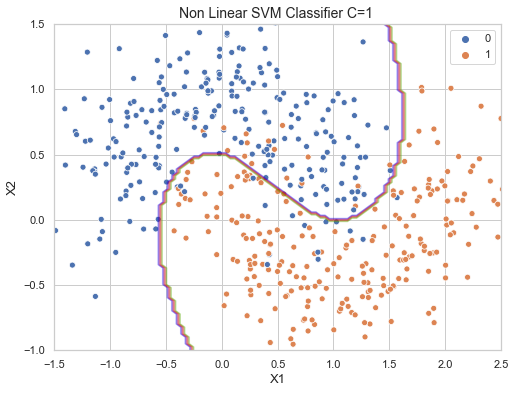

In [22]:
plt.figure(figsize=(8,6))

plot_decision_boundary(polynomial_svm_clf_1, X, y)
plt.title("Non Linear SVM Classifier C=1 ", fontsize=14)
plt.show()

In [23]:
y_non_svm_pred = polynomial_svm_clf_1.predict(X)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_non_svm_pred))

0.93


#### 7.5 Train Linear SVM Classifier (C=10, 100, 1000)

In [25]:
polynomial_svm_clf_10 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, max_iter=100*100, random_state=42))
    ])

polynomial_svm_clf_100 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=100, max_iter=100*1000, random_state=42))
    ])

polynomial_svm_clf_1000 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1000,max_iter=100*10000, random_state=42))
    ])


In [26]:
polynomial_svm_clf_10.fit(X, y)
polynomial_svm_clf_100.fit(X, y)
polynomial_svm_clf_1000.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=1000, max_iter=1000000, random_state=42))])

#### 7.6 Visualize Linear SVM Classifier (C=10, 100, 100)

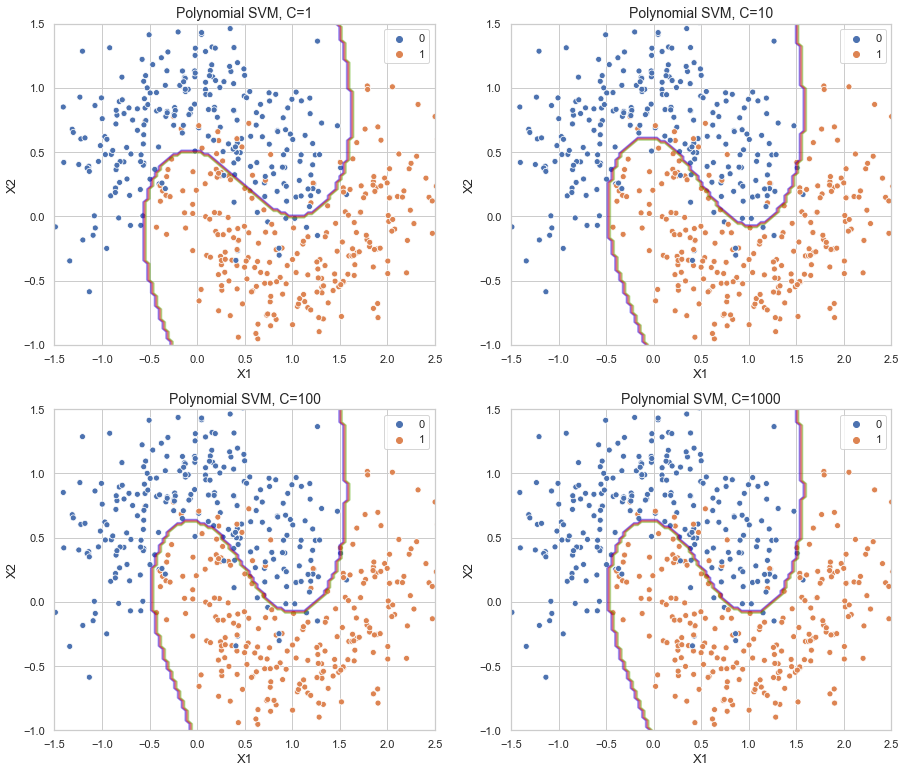

In [27]:
plt.figure(figsize=(15,13))

plt.subplot(221)
plot_decision_boundary(polynomial_svm_clf_1, X, y)
plt.title("Polynomial SVM, C=1", fontsize=14)

plt.subplot(222)
plot_decision_boundary(polynomial_svm_clf_10, X, y)
plt.title("Polynomial SVM, C=10", fontsize=14)

plt.subplot(223)
plot_decision_boundary(polynomial_svm_clf_100, X, y)
plt.title("Polynomial SVM, C=100", fontsize=14)

plt.subplot(224)
plot_decision_boundary(polynomial_svm_clf_1000, X, y)
plt.title("Polynomial SVM, C=1000", fontsize=14)

plt.show()

### Bagging with Decision Tree Classifier

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, random_state=42)

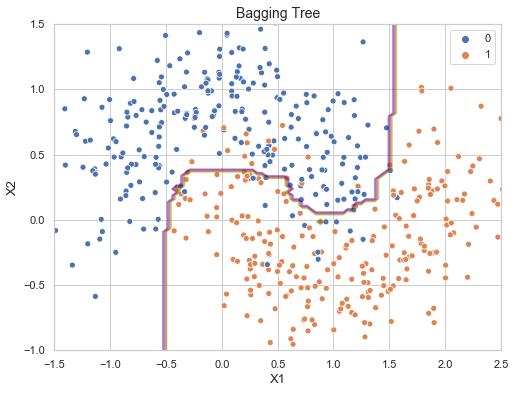

In [44]:
plt.figure(figsize=(8,6))

plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging Tree", fontsize=14)
plt.show()

### Boosting (Ada Boosting) with Decision Tree

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500, random_state=42)

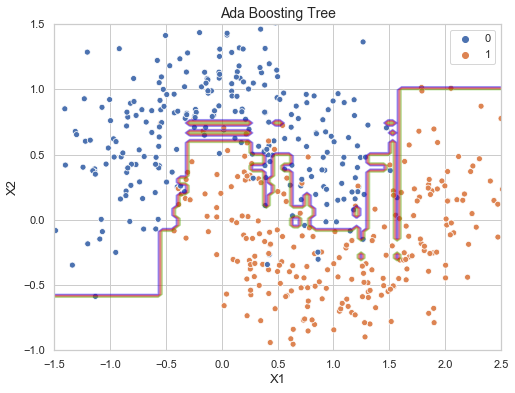

In [46]:
plt.figure(figsize=(8,6))

plot_decision_boundary(ada_clf, X, y)
plt.title("Ada Boosting Tree", fontsize=14)
plt.show()

### Boosting (Gradient Boosting) with Decision Tree

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_clf = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_clf.fit(X, y)

GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=42)

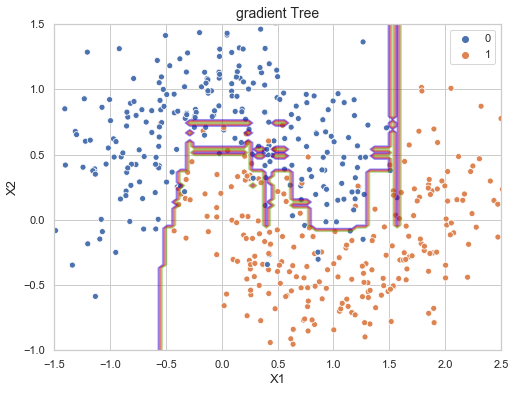

In [48]:
plt.figure(figsize=(8,6))

plot_decision_boundary(gbrt_clf, X, y)
plt.title("gradient Tree", fontsize=14)
plt.show()

'C:\\Users\\Dell\\Desktop\\Internship\\day25'